<a href="https://colab.research.google.com/github/ShubhamD-Genzeon/AI_ML_Training_2024/blob/main/Multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple_linear_regression

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [4]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.shape

(50, 5)

In [6]:
len(df)

50

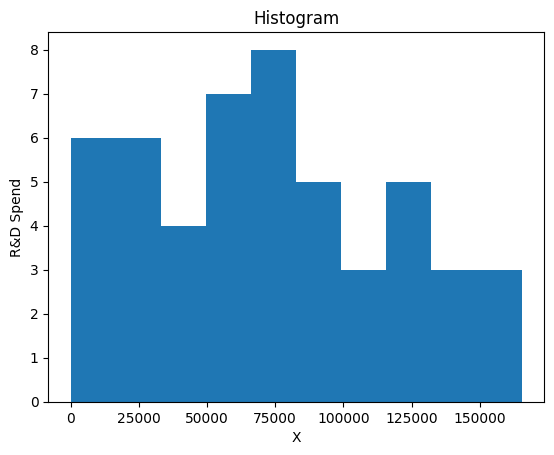

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

#create a histogram for R&D
plt.hist(df['R&D Spend'],bins=10)
#plt.xticks(range(len(df)),[str(i) for i in range(len(df))])
plt.xlabel("X")
plt.ylabel('R&D Spend')
plt.title('Histogram')
plt.show()

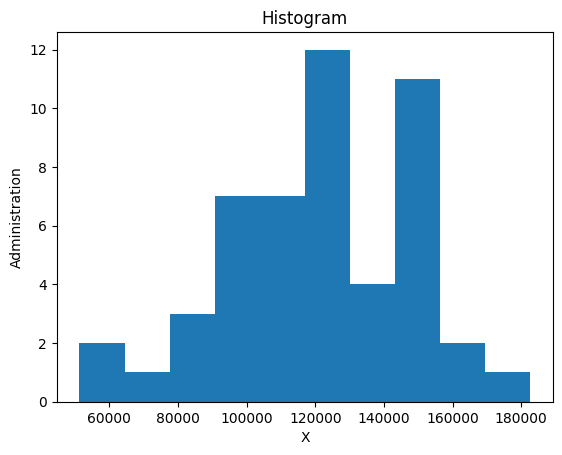

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

#create a histogram for R&D
plt.hist(df['Administration'])
plt.xlabel("X")
plt.ylabel('Administration')
plt.title('Histogram')
plt.show()

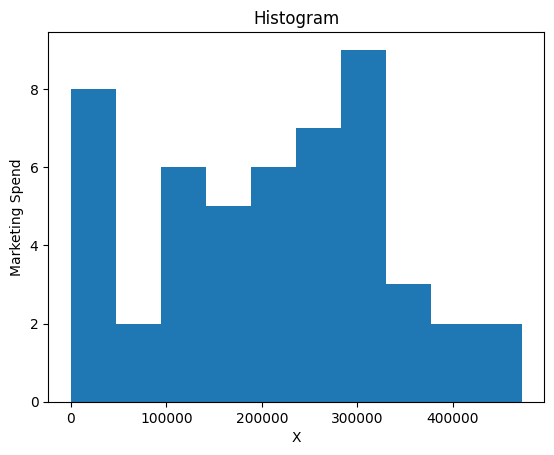

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

#create a histogram for R&D
plt.hist(df['Marketing Spend'])
plt.xlabel("X")
plt.ylabel('Marketing Spend')
plt.title('Histogram')
plt.show()

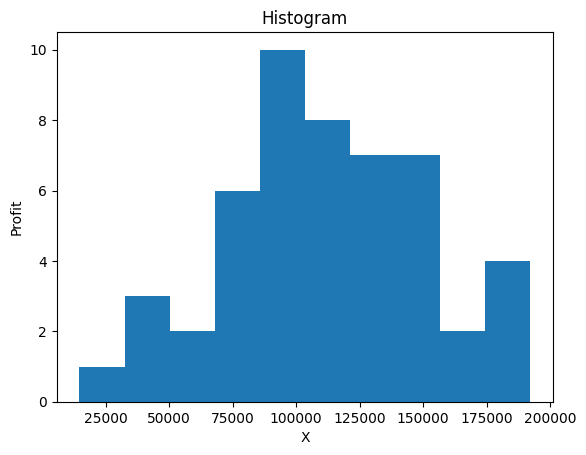

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

#create a histogram for R&D
plt.hist(df['Profit'])
plt.xlabel("X")
plt.ylabel('Profit')
plt.title('Histogram')
plt.show()

In [14]:
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Assuming you have the dataset stored in a DataFrame called 'data'
# df=pd.read_csv(df)

# # One-hot encode the 'State' column
# column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), [3])], remainder='passthrough')
# X_encoded = column_transformer.fit_transform(X)

states=df['State']
# Perform label encoding on the 'State' column
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(states)
print(df)

    R&D Spend  Administration  Marketing Spend  State     Profit
0   165349.20       136897.80        471784.10      2  192261.83
1   162597.70       151377.59        443898.53      0  191792.06
2   153441.51       101145.55        407934.54      1  191050.39
3   144372.41       118671.85        383199.62      2  182901.99
4   142107.34        91391.77        366168.42      1  166187.94
5   131876.90        99814.71        362861.36      2  156991.12
6   134615.46       147198.87        127716.82      0  156122.51
7   130298.13       145530.06        323876.68      1  155752.60
8   120542.52       148718.95        311613.29      2  152211.77
9   123334.88       108679.17        304981.62      0  149759.96
10  101913.08       110594.11        229160.95      1  146121.95
11  100671.96        91790.61        249744.55      0  144259.40
12   93863.75       127320.38        249839.44      1  141585.52
13   91992.39       135495.07        252664.93      0  134307.35
14  119943.24       15654

<Axes: >

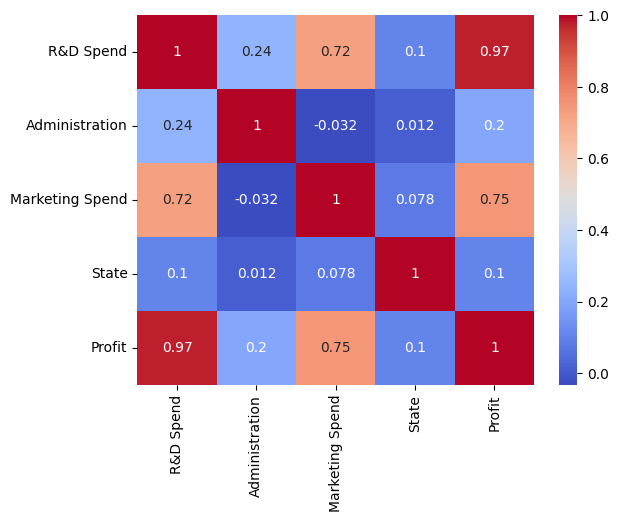

In [15]:
#Selecting the numerical columns for correlation analysis
numerical_columns = ["R&D Spend", "Administration", "Marketing Spend","State","Profit"]
numerical_data = df[numerical_columns]

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualizing the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

In [16]:
#This will give you a pandas Series object containing the correlation coefficients between "Profit" and each of the other variables.
profit_correlations = correlation_matrix["Profit"]


In [17]:
#This will give you a sorted Series object with the variables ordered based on their correlation coefficients with "Profit."
profit_correlations_sorted = profit_correlations.sort_values(ascending=False)

In [18]:
print(profit_correlations_sorted)

Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
State              0.101796
Name: Profit, dtype: float64


In [19]:
#splitting the data
import pandas as pd
from sklearn.model_selection import train_test_split

X = df[['R&D Spend', 'Administration', 'Marketing Spend','State']]
y = df['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train

,R&D Spend,Administration,Marketing Spend,State
9,123334.88,108679.17,304981.62,0
43,15505.73,127382.30,35534.17,2
2,153441.51,101145.55,407934.54,1
44,22177.74,154806.14,28334.72,0
33,55493.95,103057.49,214634.81,1
3,144372.41,118671.85,383199.62,2
17,94657.16,145077.58,282574.31,2
35,46014.02,85047.44,205517.64,2
36,28663.76,127056.21,201126.82,1
13,91992.39,135495.07,252664.93,0


In [21]:
X_test

,R&D Spend,Administration,Marketing Spend,State
49,0.00,116983.80,45173.06,0
48,542.05,51743.15,0.00,2
32,63408.86,129219.61,46085.25,0
21,78389.47,153773.43,299737.29,2
4,142107.34,91391.77,366168.42,1
11,100671.96,91790.61,249744.55,0
7,130298.13,145530.06,323876.68,1
45,1000.23,124153.04,1903.93,2
14,119943.24,156547.42,256512.92,1
19,86419.70,153514.11,0.00,2


In [22]:
y_train

9     149759.96
43     69758.98
2     191050.39
44     65200.33
33     96778.92
3     182901.99
17    125370.37
35     96479.51
36     90708.19
13    134307.35
1     191792.06
39     81005.76
26    105733.54
28    103282.38
18    124266.90
41     77798.83
23    108733.99
6     156122.51
37     89949.14
42     71498.49
10    146121.95
0     192261.83
34     96712.80
16    126992.93
12    141585.52
5     156991.12
8     152211.77
29    101004.64
31     97483.56
24    108552.04
40     78239.91
15    129917.04
25    107404.34
27    105008.31
47     42559.73
20    118474.03
46     49490.75
30     99937.59
22    110352.25
38     81229.06
Name: Profit, dtype: float64

In [23]:
y_test

49     14681.40
48     35673.41
32     97427.84
21    111313.02
4     166187.94
11    144259.40
7     155752.60
45     64926.08
14    132602.65
19    122776.86
Name: Profit, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [25]:
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# The model.coef_ attribute will provide the coefficients of the features (predictor variables) in the same order as they were specified in X_train. The model.intercept_ attribute will give you the intercept or bias term of the linear regression model.

Coefficients: [ 7.96099923e-01 -3.74559573e-02  2.73190631e-02 -1.05507063e+03]
Intercept: 54350.47756892868


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 234546164.6299347
R-squared: 0.9006320969922609


In [27]:
ReDev=int(input("Give R&D_Spend"))
Administration=int(input("Give Administration Spend"))
Marketing_Spend=int(input("Give Marketing_Spend"))
State=int(input("Give a number for state (California=0,Florida=1,New York=2)"))
Profit=intercept+(coefficients[0]*ReDev)+(coefficients[1]*Administration)+(coefficients[2]*Marketing_Spend)+(coefficients[3]*State)
Profit

Give R&D_Spend165349
Give Administration Spend136897
Give Marketing_Spend471784
Give a number for state (California=0,Florida=1,New York=2)2


191635.75111907843